<a href="https://colab.research.google.com/github/farihane-redouan/BASIC-ALGORITHMS-MACHINE-DEEP-LEARNING/blob/main/Basic-machine-learning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression

## **1.Dataset**

In [6]:
x,y=make_regression(n_samples=100,n_features=2,noise=10)
y=y.reshape(100,1)
print(np.shape(x))
print(np.shape(y))

(100, 2)
(100, 1)


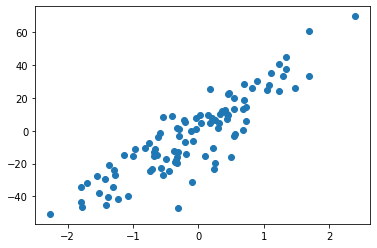

In [52]:
plt.scatter(x[:,0],y)

In [53]:
X=np.hstack((x,np.ones((np.shape(x)[0],1))))
print(X.shape)


(100, 3)


In [54]:
np.random.seed(0)
teta =np.random.randn(3,1)
teta

array([[1.76405235],
       [0.40015721],
       [0.97873798]])

## **2. Modele Polynomiale**

In [55]:
def model(data,teta):
  return data.dot(teta)

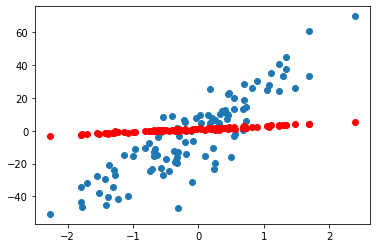

In [56]:
x.shape
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],model(X,teta), c='r')

## **3. Fonction Cout : Erreur Quadratique moyenne**

On mesure les erreurs du modele sur le Dataset X, y en implémenter l'erreur quadratique moyenne, Mean Squared Error (MSE) .

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [57]:
def Fonction_Cout(x,teta,y):
  m=len(y)
  return (1/2*m)*np.sum(((model(x,teta))-y)**2)

## **4. Gradients et Descente de Gradient**

On implémente la formule du gradient pour la MSE

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Ensuite on utilise cette fonction dans la descente de gradient:

$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$

In [58]:
def Gradients(x,teta,y):
  m=len(y)
  return (1/m)*(x.T).dot((model(x,teta))-y)

In [59]:
def Descente_Gradient(x,teta,y,rate,nb_iteration):
  cost_history=np.zeros(nb_iteration)  # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
  for i in range(0,nb_iteration):
    teta=teta-rate*Gradients(x,teta,y) # mise a jour du parametre theta (formule du gradient descent)
    cost_history[i]=Fonction_Cout(x,teta,y) # on enregistre la valeur du Cout au tour i dans cost_history[i]
  return teta,cost_history

## **5. Phase d'entrainement**

On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage $\alpha$.

Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

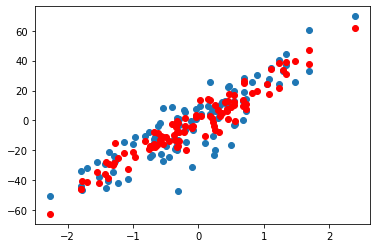

In [60]:
nb_iteration=1000
learning_rate=0.01
teta_final,cost_history=Descente_Gradient(X,teta,y,learning_rate,nb_iteration)
predection=model(X,teta_final)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],predection,c='r')

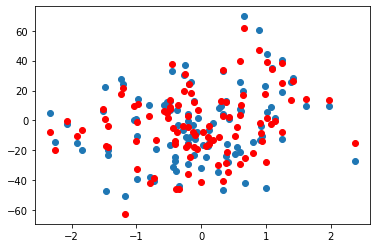

In [63]:
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],predection,c='r')

## **6. Courbes d'apprentissage**

Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction coût à travers le nombre d'itérations. On cherche à obtenir une courbe qui diminue a chaque itération jusqu'à stagner à un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate $\alpha$, est peut-être trop élevé, il faut prendre un pas plus petite.

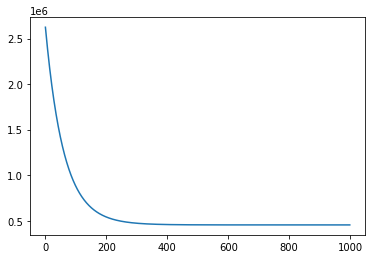

In [61]:
plt.plot(range(nb_iteration),cost_history)